In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Adwaitttttt/DataSet/main/SLR/ToyotaCorolla.csv",encoding='latin1')
df.head(2)

Id                                          Model  Price  Age_08_04  \
0   1  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2  TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1               1      0          0            0   
1                0               1      0          0            0   

   Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                 1             0               0        0  
1                 1             0               0        0  

[2 rows x 38 columns]

In [3]:
df = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
df

Price  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight
0     13500         23  46986   90  2000      3      5            210    1165
1     13750         23  72937   90  2000      3      5            210    1165
2     13950         24  41711   90  2000      3      5            210    1165
3     14950         26  48000   90  2000      3      5            210    1165
4     13750         30  38500   90  2000      3      5            210    1170
...     ...        ...    ...  ...   ...    ...    ...            ...     ...
1431   7500         69  20544   86  1300      3      5             69    1025
1432  10845         72  19000   86  1300      3      5             69    1015
1433   8500         71  17016   86  1300      3      5             69    1015
1434   7250         70  16916   86  1300      3      5             69    1015
1435   6950         76      1  110  1600      5      5             19    1114

[1436 rows x 9 columns]

In [4]:
df.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1435 non-null   int64
 1   Age_08_04      1435 non-null   int64
 2   KM             1435 non-null   int64
 3   HP             1435 non-null   int64
 4   cc             1435 non-null   int64
 5   Doors          1435 non-null   int64
 6   Gears          1435 non-null   int64
 7   Quarterly_Tax  1435 non-null   int64
 8   Weight         1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [9]:
df.describe()

Price    Age_08_04             KM           HP            cc  \
count   1435.000000  1435.000000    1435.000000  1435.000000   1435.000000   
mean   10720.915679    55.980488   68571.782578   101.491986   1576.560976   
std     3608.732978    18.563312   37491.094553    14.981408    424.387533   
min     4350.000000     1.000000       1.000000    69.000000   1300.000000   
25%     8450.000000    44.000000   43000.000000    90.000000   1400.000000   
50%     9900.000000    61.000000   63451.000000   110.000000   1600.000000   
75%    11950.000000    70.000000   87041.500000   110.000000   1600.000000   
max    32500.000000    80.000000  243000.000000   192.000000  16000.000000   

             Doors        Gears  Quarterly_Tax       Weight  
count  1435.000000  1435.000000    1435.000000  1435.000000  
mean      4.032753     5.026481      87.020209  1072.287108  
std       0.952667     0.188575      40.959588    52.251882  
min       2.000000     3.000000      19.000000  1000.000000  
25%       3.000000     5.000000      69.000000  1040.000000  
50%       4.000000     5.000000      85.000000  1070.000000  
75%       5.000000     5.000000      85.000000  1085.000000  
max       5.000000     6.000000     283.000000  1615.000000

<Axes: >

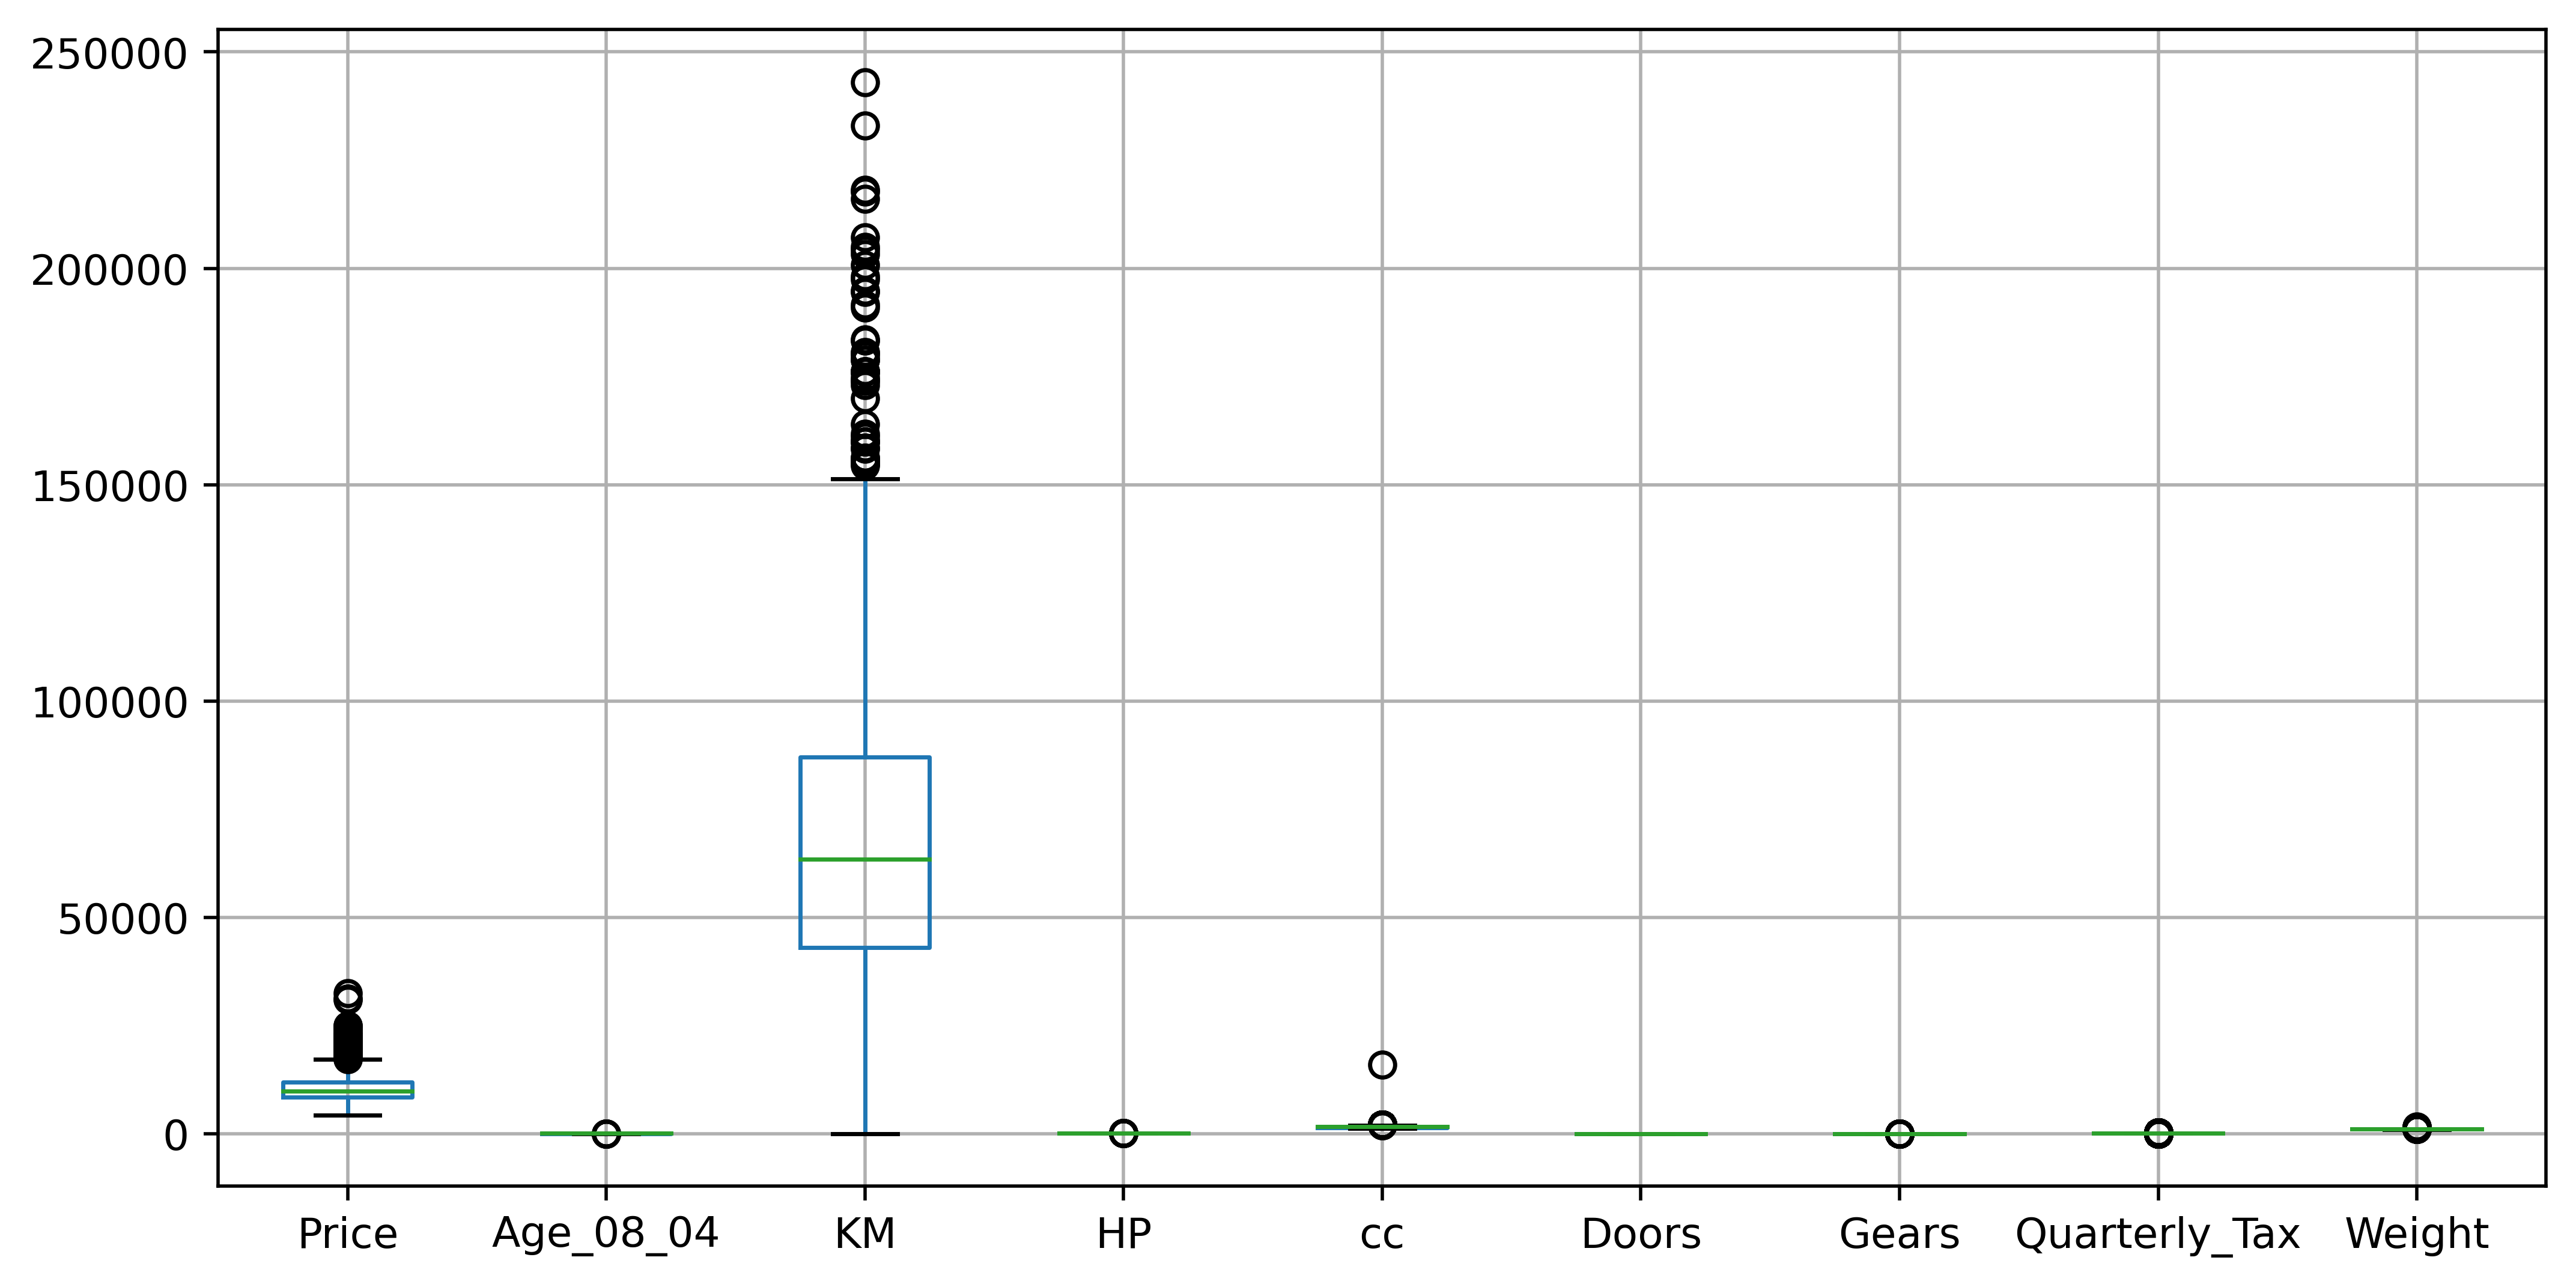

In [10]:
df.boxplot()

In [11]:
def outlier(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)

  iqr = q3 - q1

  lower = q1 - (1.5*iqr)
  upper = q3 + (1.5*iqr)

  return lower, upper

In [12]:
outlier(df,"Age_08_04")

(5.0, 109.0)

In [13]:
df.loc[df["Age_08_04"] < 5.0, "Age_08_04"] = 5.0

In [14]:
outlier(df,"KM")

(-23062.25, 153103.75)

In [15]:
df.loc[df["KM"] > 153103.75, "KM"] = 153103.75

In [16]:
outlier(df,"HP")

(60.0, 140.0)

In [17]:
df.loc[df["HP"] > 140.0, "HP"] = 140.0

In [18]:
outlier(df,"cc")

(1100.0, 1900.0)

In [19]:
df.loc[df["cc"] > 1900.0, "cc"] = 1900.0

In [20]:
outlier(df,"Gears")

(5.0, 5.0)

In [21]:
df.loc[df["Gears"] < 5.0, "Gears"] = 5.0

In [22]:
df.loc[df["Gears"] > 5.0, "Gears"] = 5.0

In [23]:
outlier(df,"Quarterly_Tax")

(45.0, 109.0)

In [24]:
df.loc[df["Quarterly_Tax"] < 45.0, "Quarterly_Tax"] = 45.0

In [25]:
df.loc[df["Quarterly_Tax"] > 109.0, "Quarterly_Tax"] = 109.0

In [26]:
outlier(df,"Weight")

(972.5, 1152.5)

In [27]:
df.loc[df["Weight"] > 1152.5, "Weight"] = 1152.5

In [28]:
outlier(df,"Price")

(3200.0, 17200.0)

In [29]:
df.loc[df["Price"] > 17200.0, "Price"] = 17200.0

<Axes: >

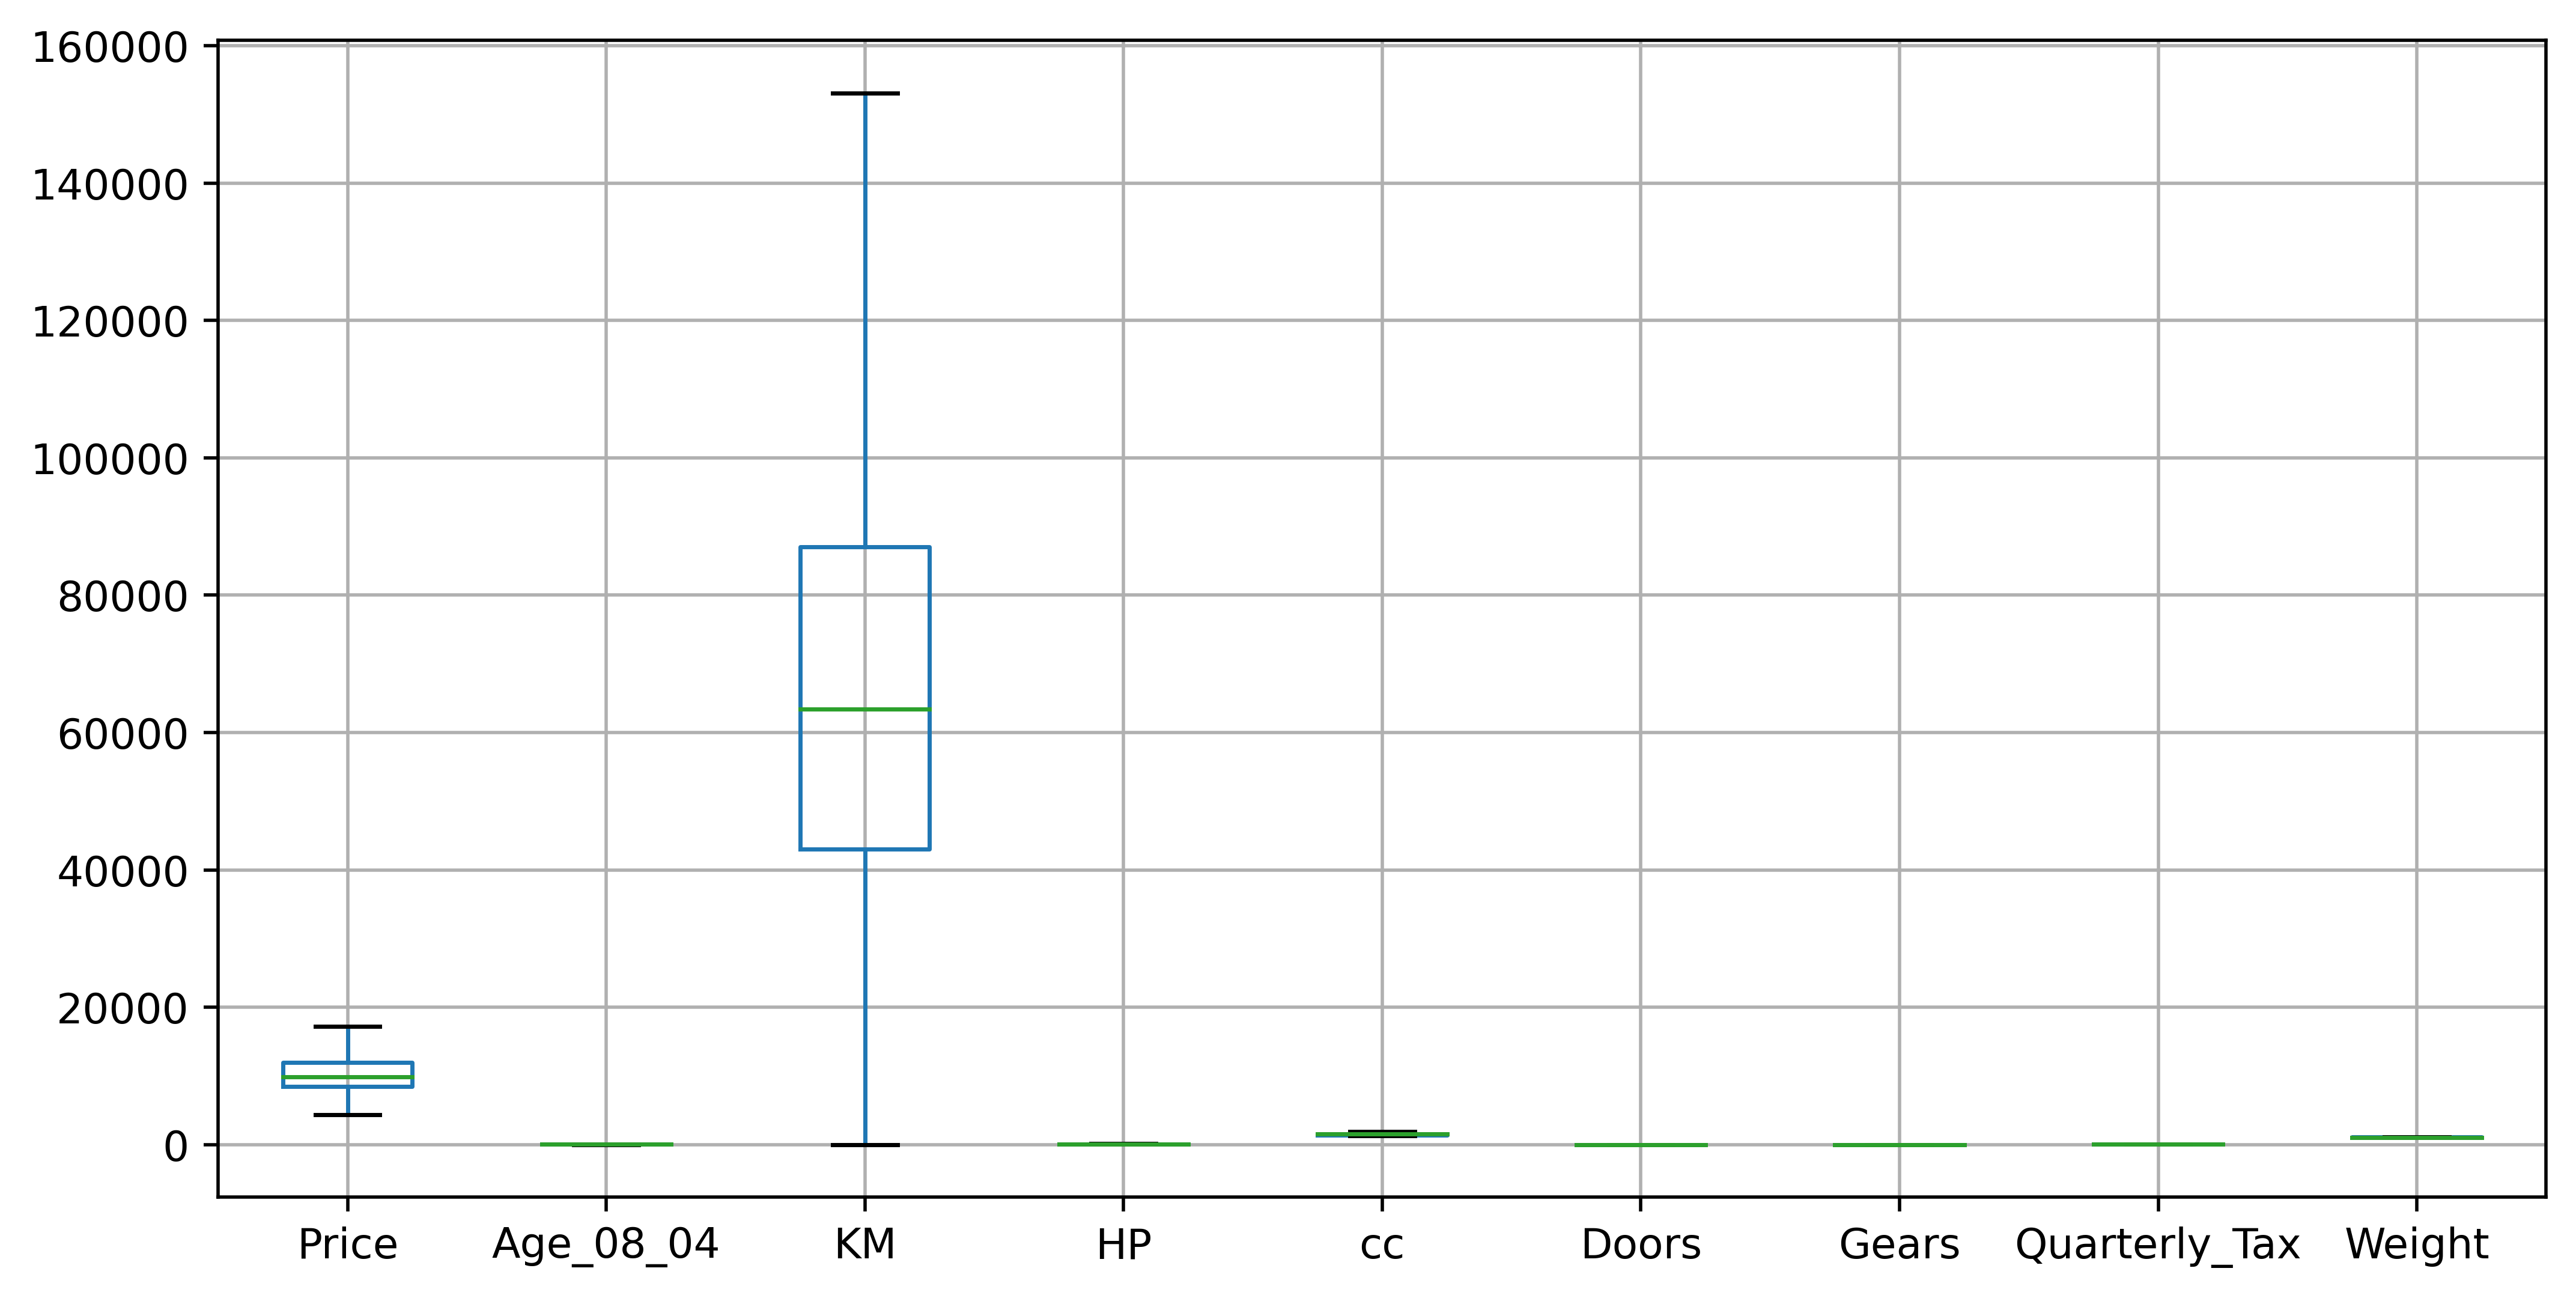

In [30]:
df.boxplot()

In [31]:
sns.pairplot(df)

<Axes: >

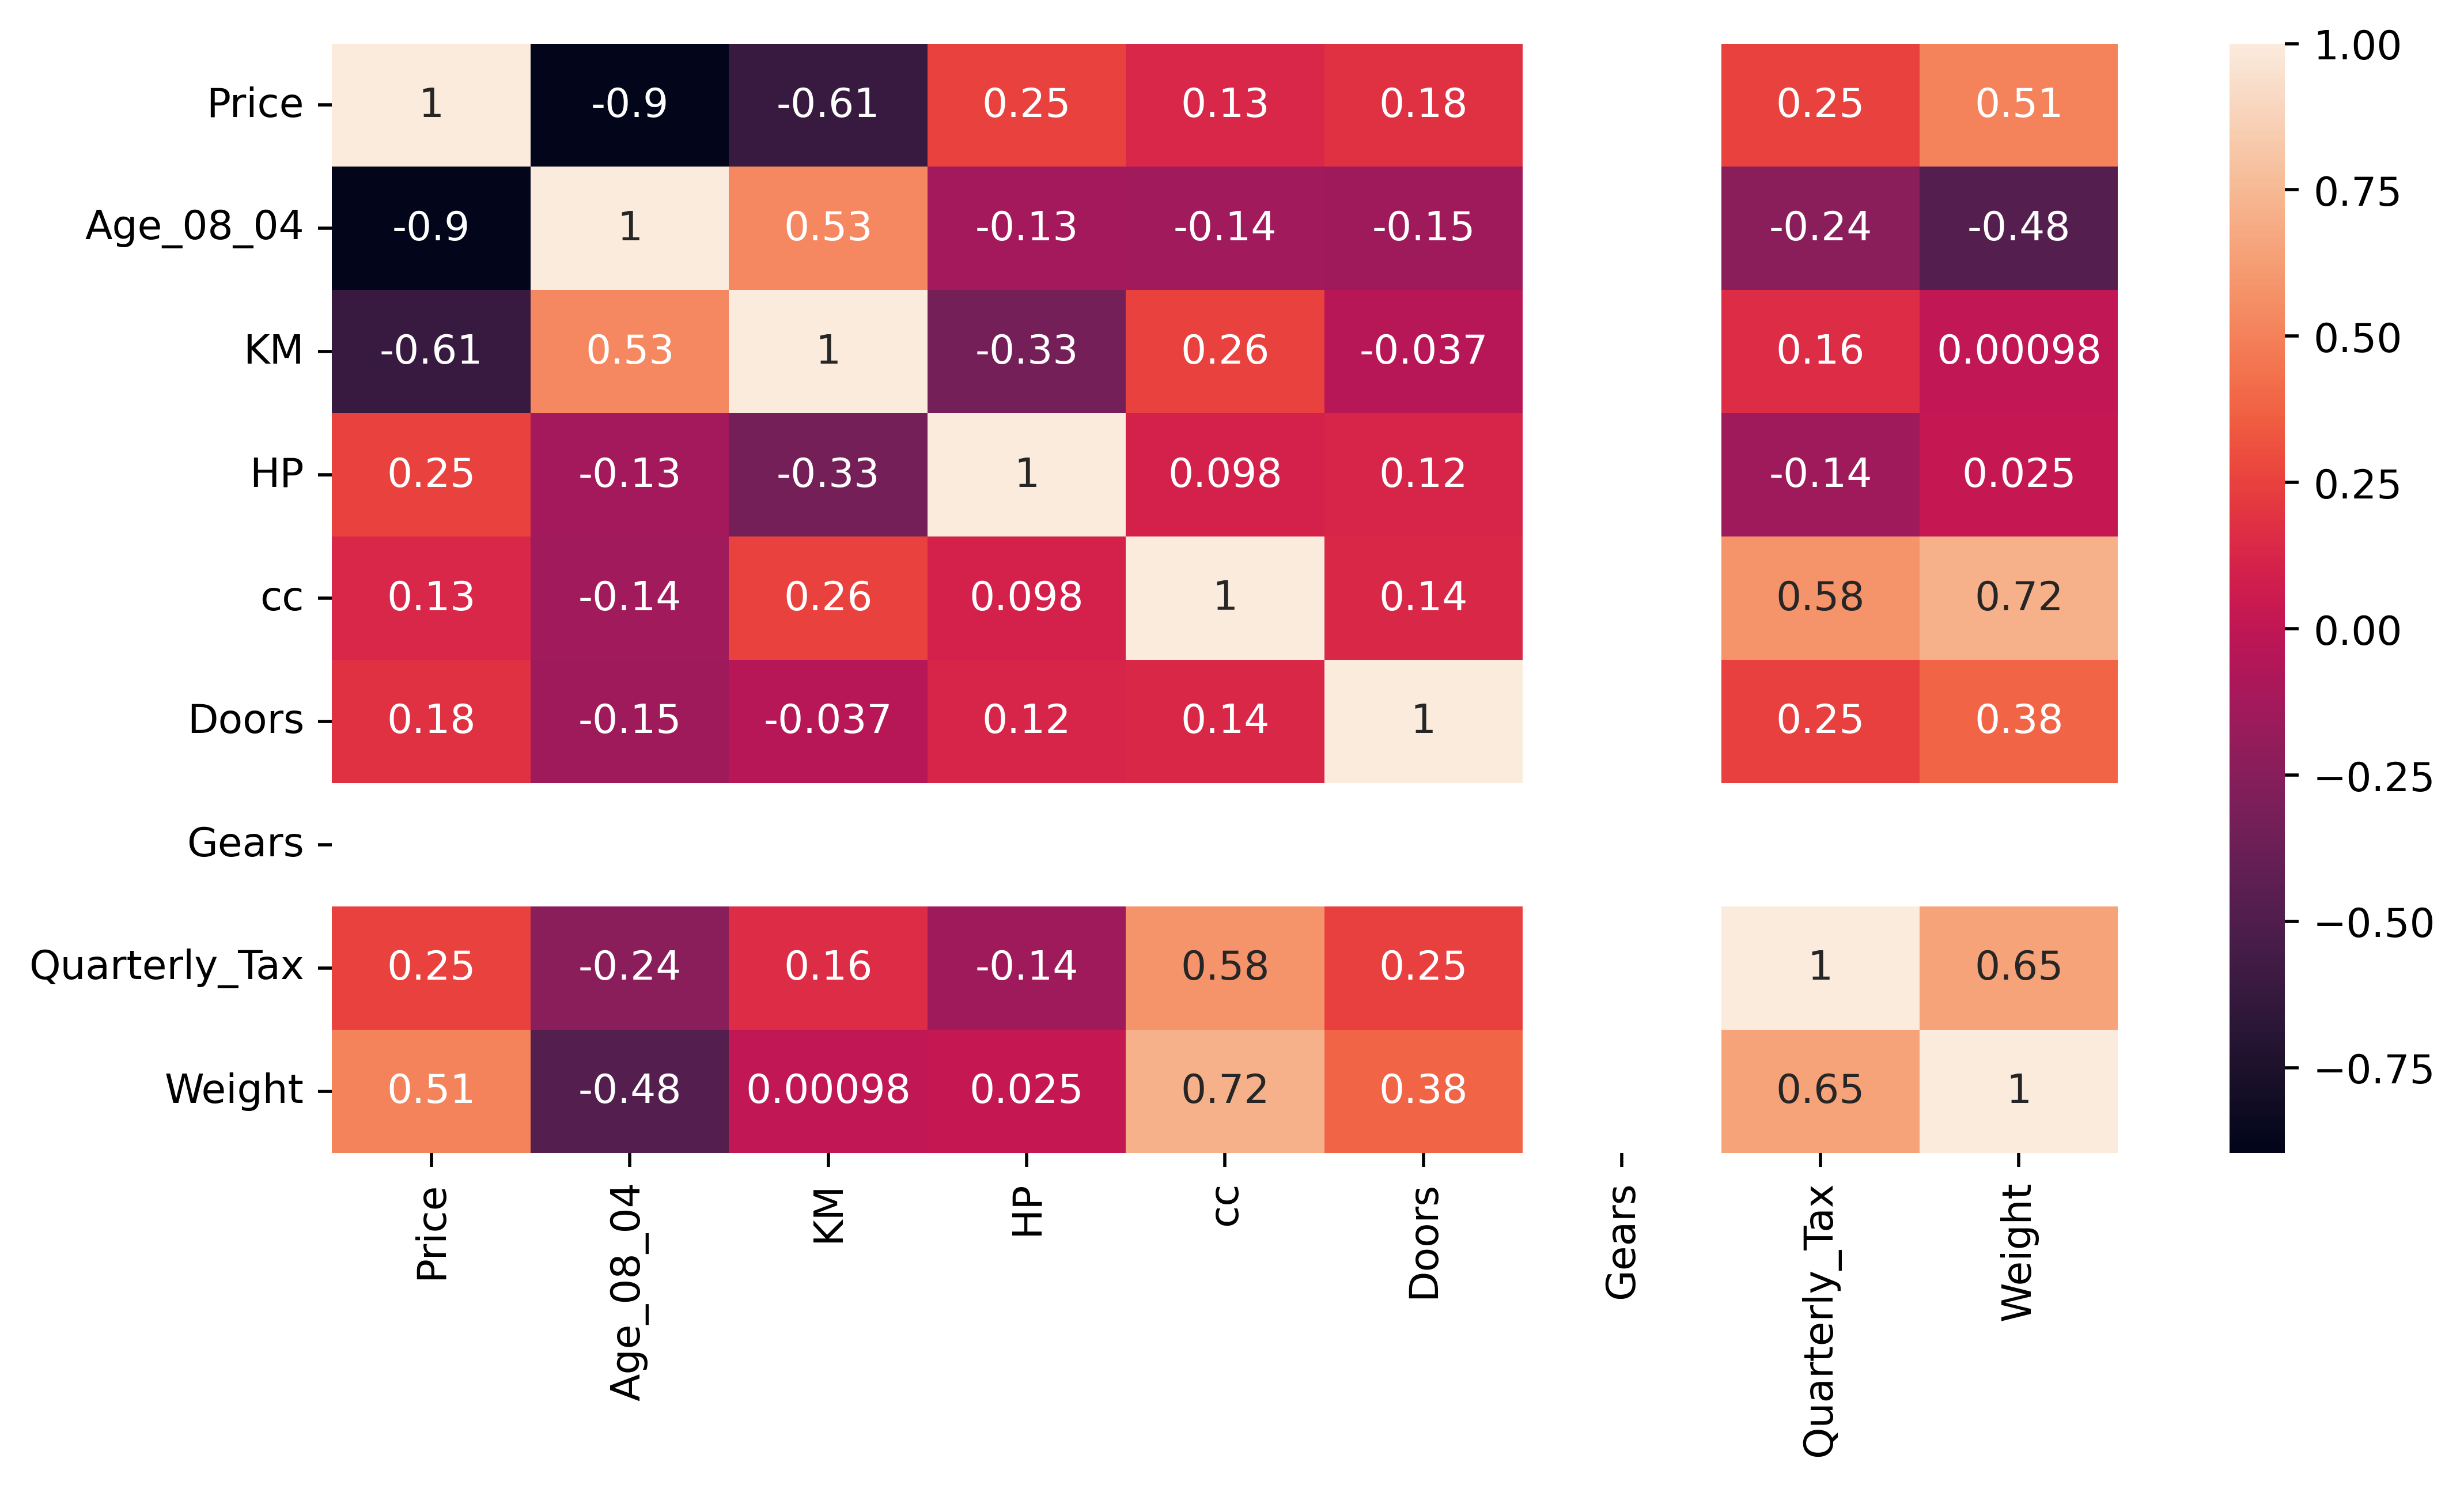

In [32]:
sns.heatmap(df.corr(),annot = True)

In [33]:
import statsmodels.formula.api as smf

In [34]:
model = smf.ols("Price ~ Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data = df).fit()
model.pvalues

Intercept         8.451460e-04
Age_08_04        5.203300e-291
KM                1.766715e-41
HP                6.511630e-30
cc                1.978899e-19
Doors             1.638085e-03
Gears             8.451460e-04
Quarterly_Tax     8.289154e-07
Weight            2.315788e-41
dtype: float64

In [35]:
model.rsquared

0.8661809342814353